# Visualizing _Supervised_ Machine Learning

## Experiments

* Logistic Regression
  * http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html
  * http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* PCA feature selection

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x1df50637278>

In [4]:
# if this is true, all images are saved to disk
global_print_flag = False

In [5]:
!mkdir tmp_figures

A subdirectory or file tmp_figures already exists.


# Loading and exploring our data set

This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle        

In [6]:
# Choose one of the two following data sets, the larger one gives better results, but might clutter the visualization depending on resolution

# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

In [7]:
import pandas as pd
# df = pd.read_csv('./insurance-customers-300.csv', sep=';')
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [8]:
# we deliberately decide this is going to be our label, it is often called lower case y
y=df['group']

In [9]:
# since 'group' is now the label we want to predict, we need to remove it from the training data 
df.drop('group', axis='columns', inplace=True)

In [10]:
# input data often is named upper case X, the upper case indicates, that each row is a vector
X = df.as_matrix()

In [11]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    if print:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)
    if fname and global_print_flag:
        fig.savefig('tmp_figures/'+fname)
        
def plot_keras_prediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                          mesh=True, fixed=None, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=(20,10))

    if clf and mesh:
        grid_X = np.array(np.c_[yy.ravel(), xx.ravel()])
        if fixed:
            fill_values = np.full((len(grid_X), 1), fixed)
            grid_X = np.append(grid_X, fill_values, axis=1)
        Z = clf.predict(grid_X)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
        
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    if print:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)
    if fname and global_print_flag:
        fig.savefig('tmp_figures/'+fname)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# using stratefy we get a balanced number of samples per category (important!)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [15]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

## Logistic Regression using the one-vs-rest (OvR) scheme
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [16]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()

In [17]:
%time lg_clf.fit(X_train_2_dim, y_train)

Wall time: 12.4 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

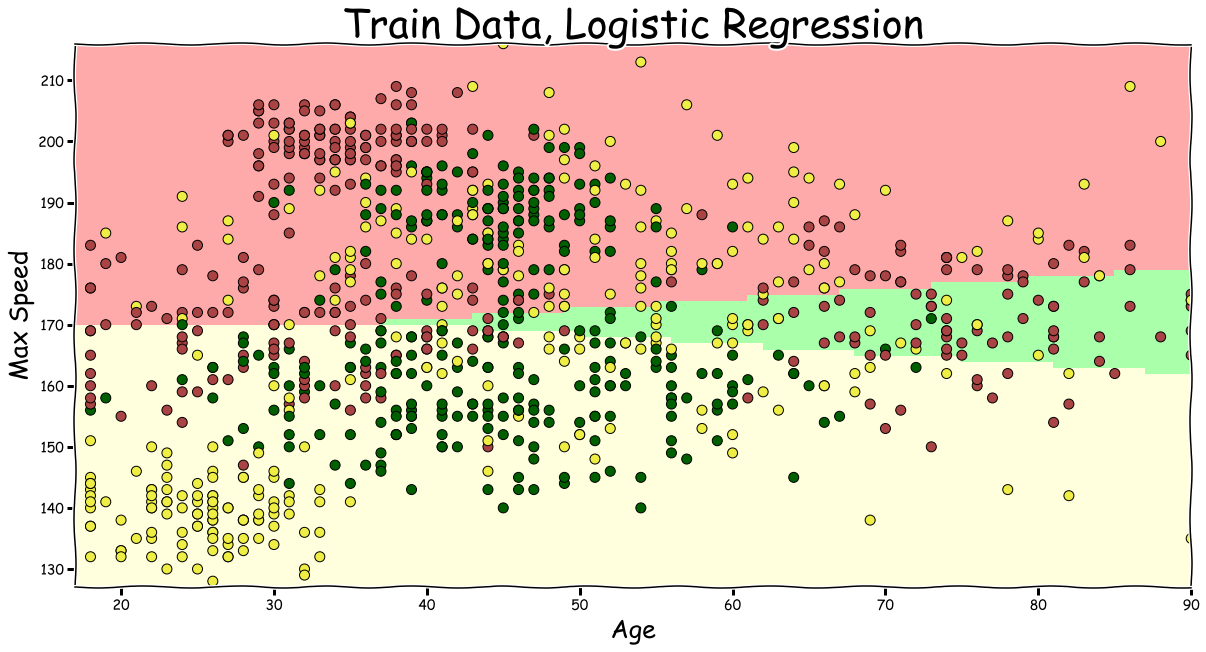

In [18]:
plotPrediction(lg_clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Logistic Regression",
                fname='logistic-regression-train.png')

In [19]:
lg_clf.score(X_train_2_dim, y_train)

0.38555555555555554

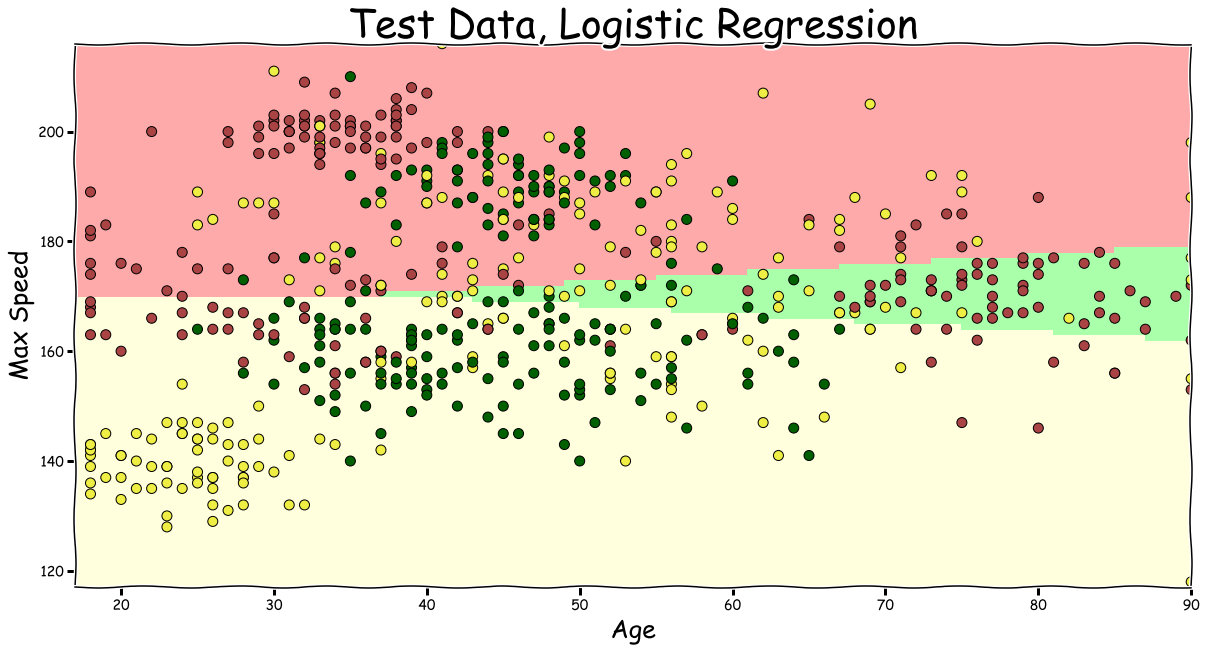

In [20]:
plotPrediction(lg_clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Logistic Regression",
                fname='logistic-regression-test.png')

In [21]:
lg_clf.score(X_test_2_dim, y_test)

0.35833333333333334

In [22]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [23]:
# cross_val_score?

Cross Validation splits the train data in different ways and performs a number of training runs (3 in this case) 

In [24]:
scores = cross_val_score(lg_clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.35215947, 0.42      , 0.40468227])

In [25]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.39 (+/- 0.06)
